In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file

xl = pd.ExcelFile("/kaggle/input/bike-sales-dataset/Bike Sales Dashboard.xlsx")


# Read the last sheet

bikes = xl.parse(xl.sheet_names[-1])


# Print the resulting DataFrame

bikes

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


**Okay, we drop the ID column since it's useless and we convert "Purchased Bike" column into a binary one!**

**We also make the "Martial Status", "Gender" and "Home Owner" binary columns**

In [3]:
bikes = bikes.drop("ID", axis=1)


bikes["Purchased Bike"] = [1 if i == "Yes" else 0 for i in bikes["Purchased Bike"]]

bikes["Martial Status"] = [1 if i == "Married" else 0 for i in bikes["Martial Status"]]

bikes["Gender"] = [1 if i == "Male" else 0 for i in bikes["Gender"]]

bikes["Home Owner"] = [1 if i == "Yes" else 0 for i in bikes["Home Owner"]]



bikes

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,Middle Age,0
1,1,1,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,Middle Age,0
2,1,1,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,Old,0
3,0,1,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,Middle Age,1
4,0,1,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,Middle Age,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,60000,2,High School,Professional,1,2,2-5 Miles,North America,54,Middle Age,1
996,0,1,70000,4,Graduate Degree,Professional,1,0,2-5 Miles,North America,35,Middle Age,1
997,1,1,60000,2,Bachelors,Skilled Manual,1,0,0-1 Miles,North America,38,Middle Age,1
998,0,1,100000,3,Bachelors,Management,0,3,1-2 Miles,North America,38,Middle Age,0


**Looking Nice!, now with the descriptive statistics**

# **Descriptive Statistics**

In [4]:
print(bikes.describe())
print(bikes.isna().sum())
print("Number of Duplicates: " + str(bikes.duplicated().sum()))

       Martial Status       Gender         Income     Children  Home Owner  \
count     1000.000000  1000.000000    1000.000000  1000.000000  1000.00000   
mean         0.538000     0.511000   56360.000000     1.898000     0.68300   
std          0.498803     0.500129   31085.635215     1.628572     0.46554   
min          0.000000     0.000000   10000.000000     0.000000     0.00000   
25%          0.000000     0.000000   30000.000000     0.000000     0.00000   
50%          1.000000     1.000000   60000.000000     2.000000     1.00000   
75%          1.000000     1.000000   70000.000000     3.000000     1.00000   
max          1.000000     1.000000  170000.000000     5.000000     1.00000   

              Cars          Age  Purchased Bike  
count  1000.000000  1000.000000     1000.000000  
mean      1.442000    44.163000        0.481000  
std       1.125123    11.364488        0.499889  
min       0.000000    25.000000        0.000000  
25%       1.000000    35.000000        0.000000

**No Nan values, but a few duplicates**

**Let's drop them!**

In [5]:
print(len(bikes))

bikes.drop_duplicates(inplace=True)

print(len(bikes))

1000
951


**Duplicates dropped successfully!, let's start the EDA**

# **Exploratory Data Analysis**

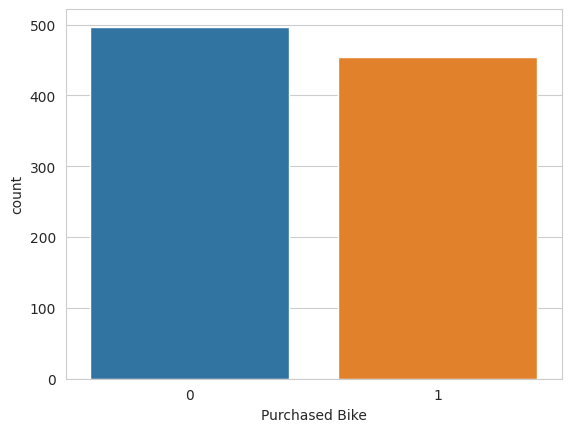

In [6]:
# set plot style
sns.set_style("whitegrid")

sns.countplot(data=bikes, x="Purchased Bike")

plt.show()

**Slightly more people didn't Purchase eventhough the ratios are pretty close**

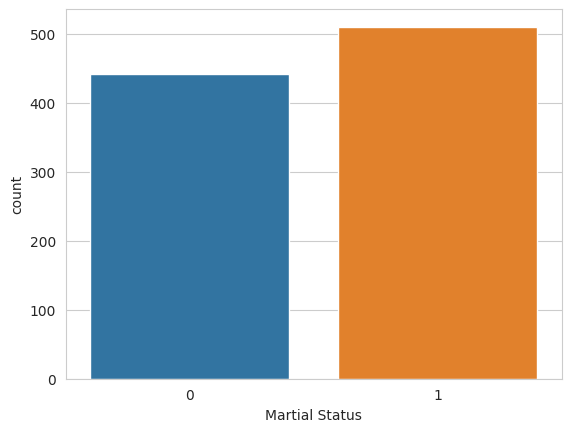

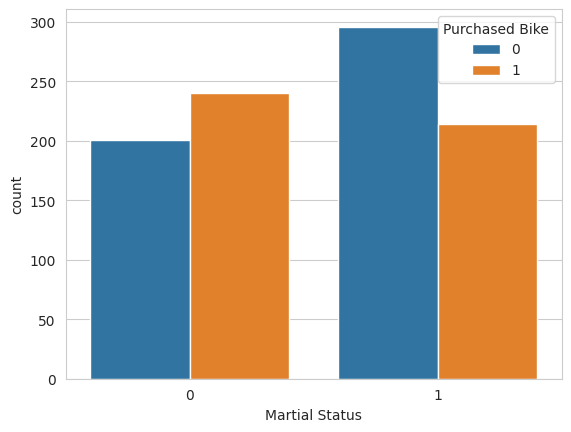

In [7]:
sns.countplot(data=bikes, x="Martial Status")

plt.show()

sns.countplot(data=bikes, x="Martial Status", hue="Purchased Bike")

plt.show()

**It seems that single people are more likely to purchase a bike than married people**

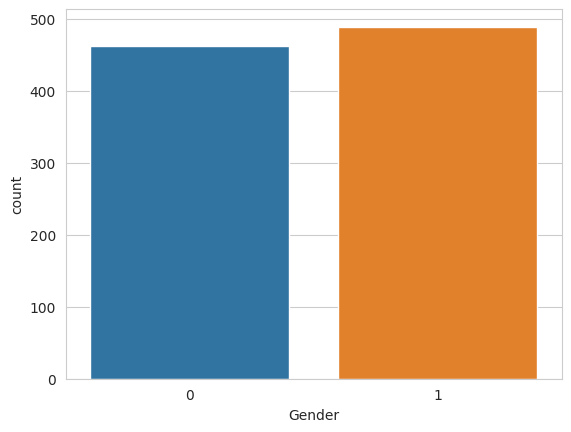

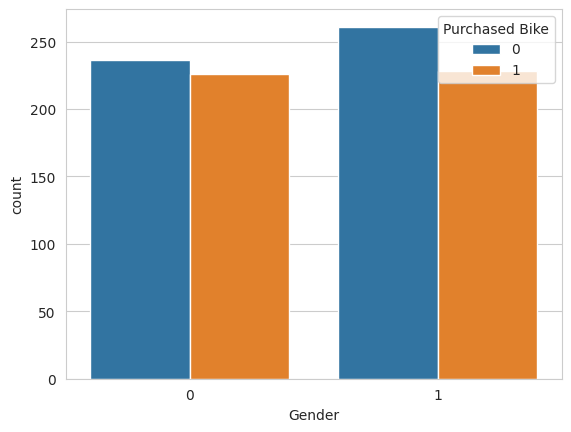

In [8]:
sns.countplot(data=bikes, x="Gender")

plt.show()

sns.countplot(data=bikes, x="Gender", hue="Purchased Bike")

plt.show()

**Males are slightly more than females here and Gender doesn't seem to have that much impact on the purchasing of bikes**

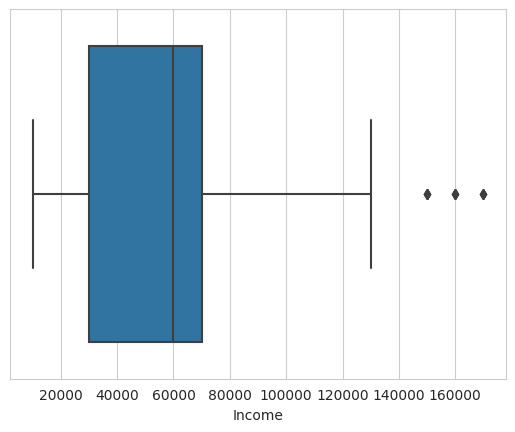

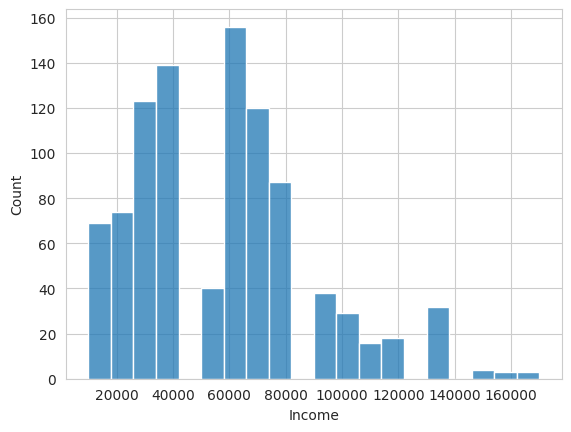

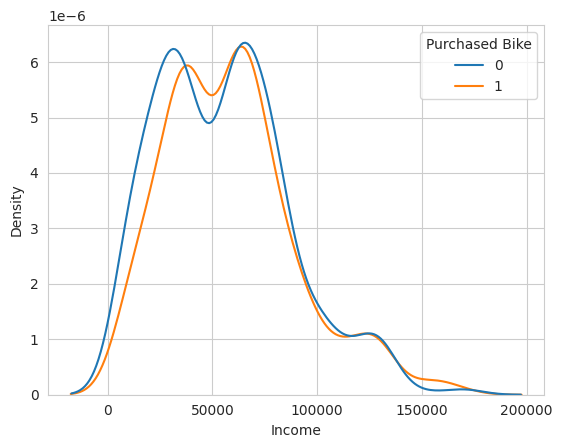

In [9]:
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)


sns.boxplot(data=bikes, x="Income")

plt.show()

sns.histplot(data=bikes, x="Income")

plt.show()

sns.kdeplot(data=bikes, x="Income", hue="Purchased Bike")

plt.show()

**Most common values are from 20000 to 100000**

**The KDE distribution of Income with Purchased Bike = 1 is pretty similar to that of Purchased Bike = 0**

**There exists a few Outliers, we'll drop them later on**

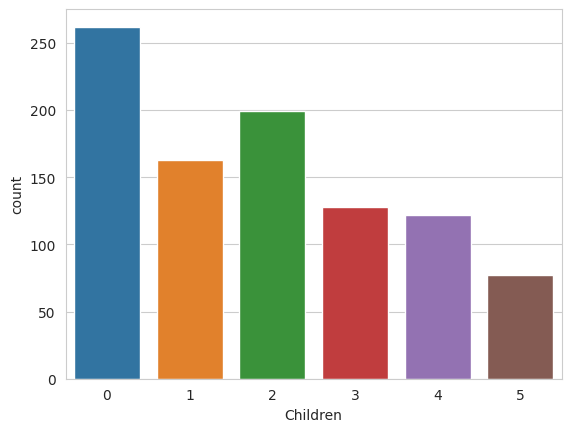

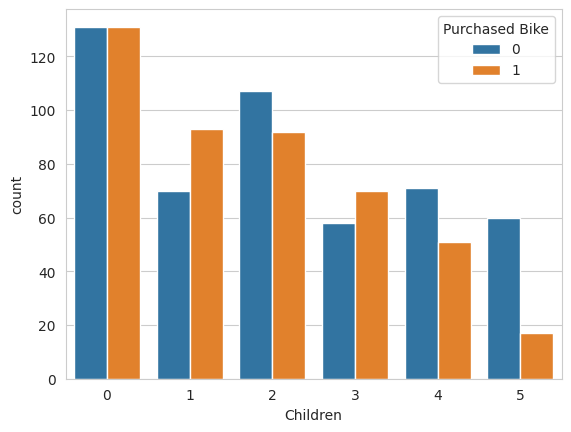

In [10]:
sns.countplot(data=bikes, x="Children")

plt.show()

sns.countplot(data=bikes, x="Children", hue="Purchased Bike")

plt.show()

**Having one or three children yields a higher probability of Purchasing**

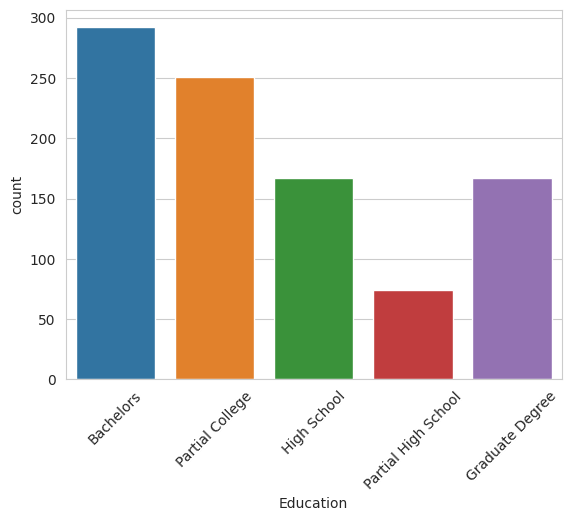

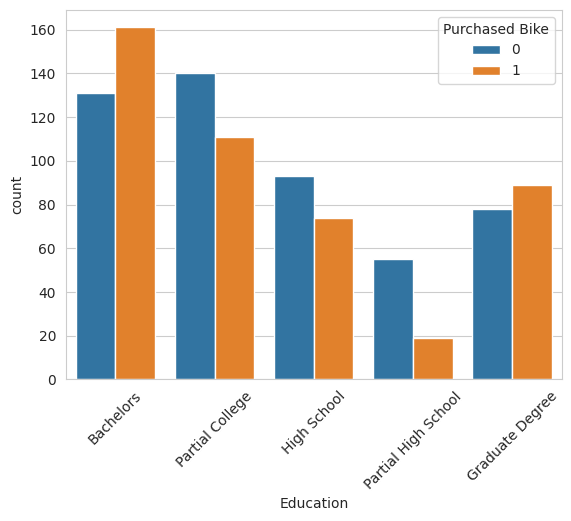

In [11]:
sns.countplot(data=bikes, x="Education")

plt.xticks(rotation=45)

plt.show()

sns.countplot(data=bikes, x="Education", hue="Purchased Bike")

plt.xticks(rotation=45)

plt.show()

**Having a Bachelors or a Graduate degree yields a higher probability of Purchasing**

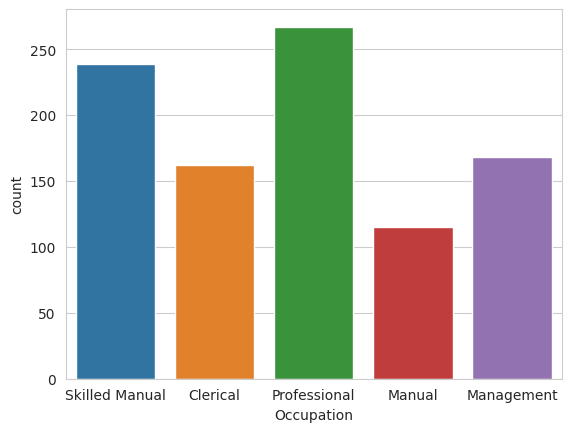

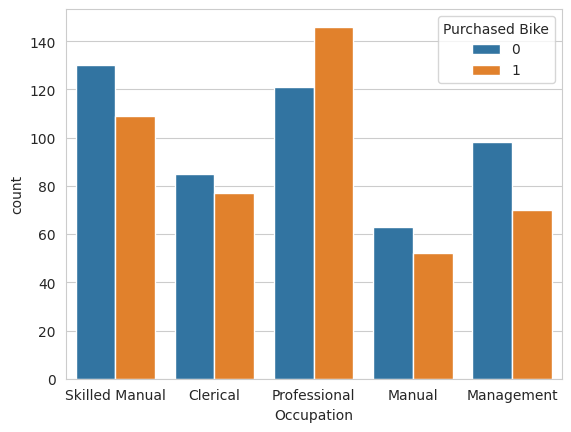

In [12]:
sns.countplot(data=bikes, x="Occupation")

plt.show()

sns.countplot(data=bikes, x="Occupation", hue="Purchased Bike")

plt.show()

**Having a Professional Occupation has a higher probability of purchasing**

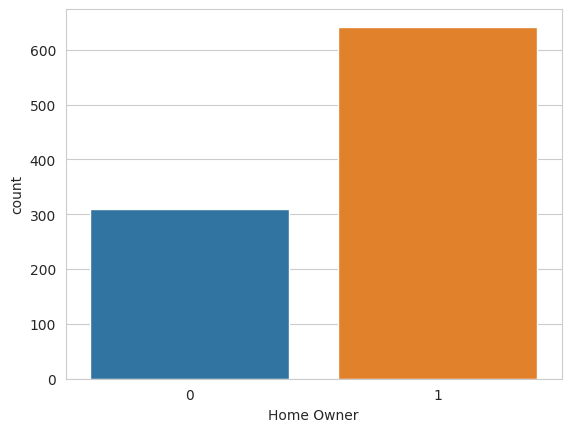

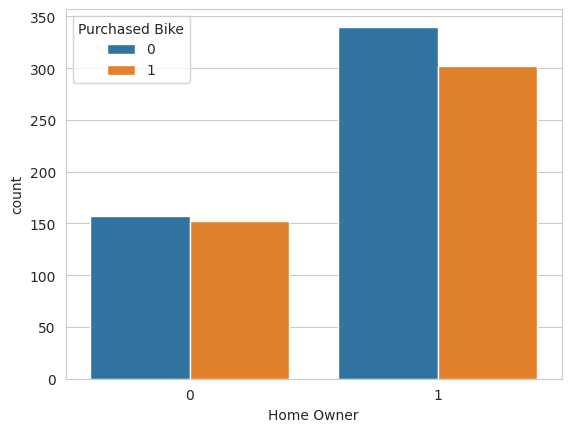

In [13]:
sns.countplot(data=bikes, x="Home Owner")

plt.show()

sns.countplot(data=bikes, x="Home Owner", hue="Purchased Bike")

plt.show()

**Those that own homes are nearly twice those that don't**

**The probability of purchasing is nearly equal to not puchasing in those that don't own homes**

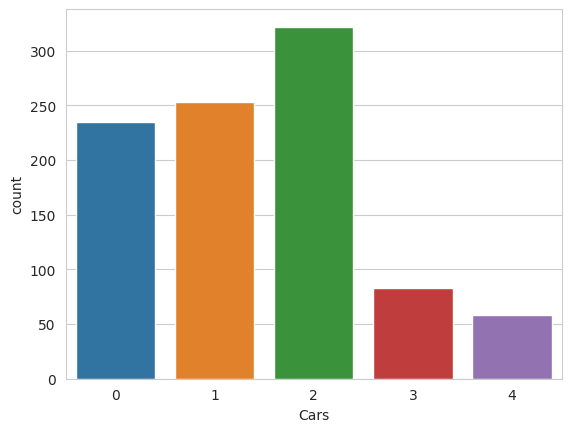

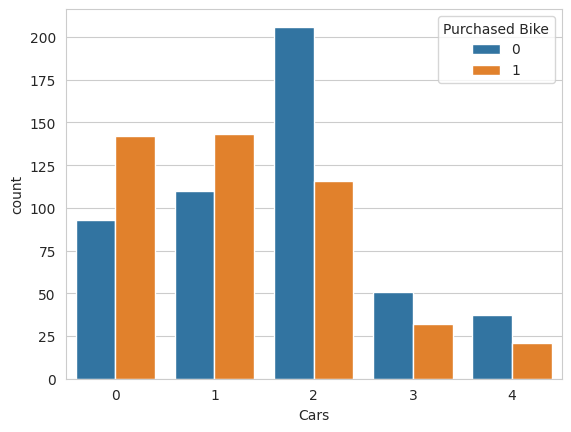

In [14]:
sns.countplot(data=bikes, x="Cars")

plt.show()

sns.countplot(data=bikes, x="Cars", hue="Purchased Bike")

plt.show()

**Those that have 0 or 1 car are more likely to purchase**

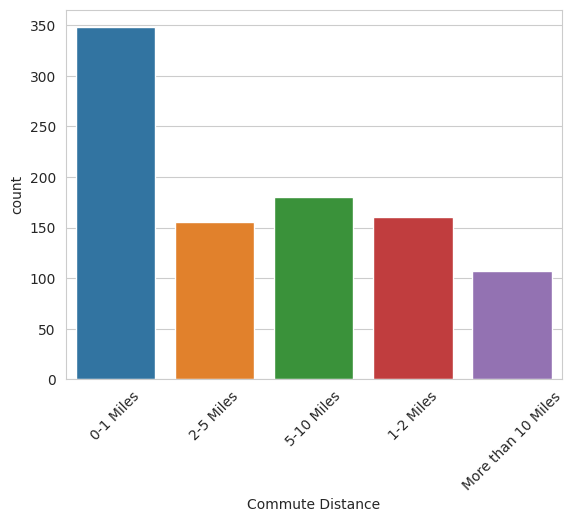

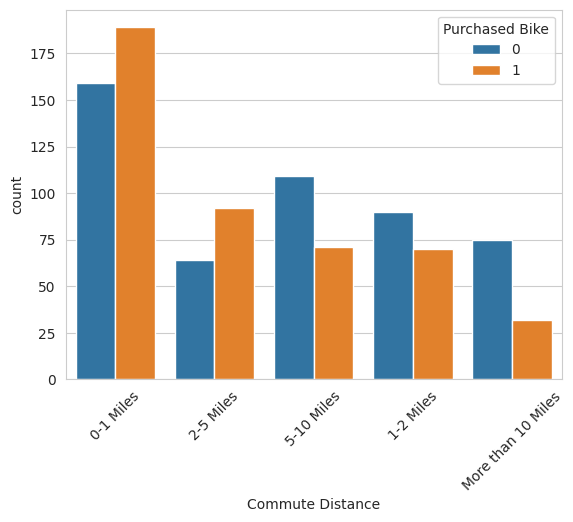

In [15]:
sns.countplot(data=bikes, x="Commute Distance")

plt.xticks(rotation=45)

plt.show()

sns.countplot(data=bikes, x="Commute Distance", hue="Purchased Bike")

plt.xticks(rotation=45)

plt.show()

**The first two categories here are more likely to purchase**

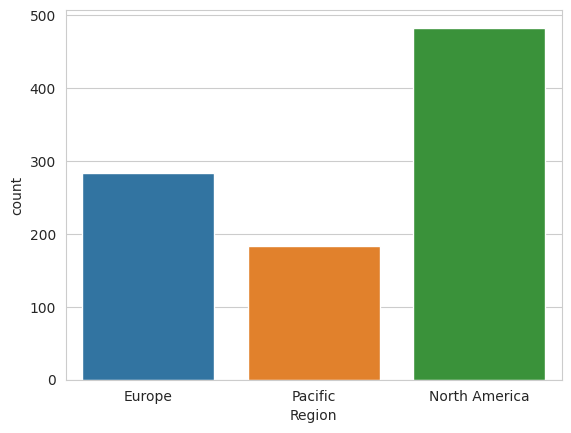

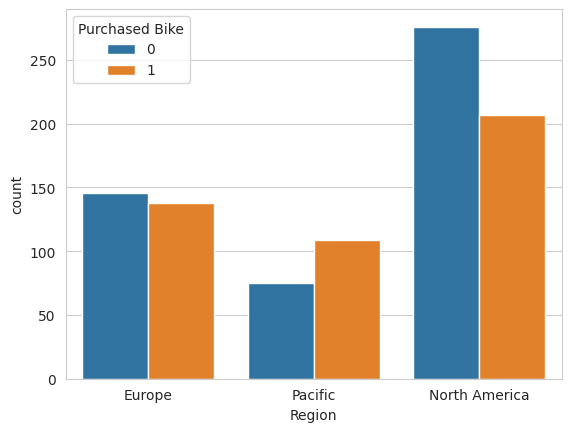

In [16]:
sns.countplot(data=bikes, x="Region")

plt.show()

sns.countplot(data=bikes, x="Region", hue="Purchased Bike")

plt.show()

**Probabilities are nearly equal in Europe and Purchasing is more likely in Pacific Region and less likely in North America**

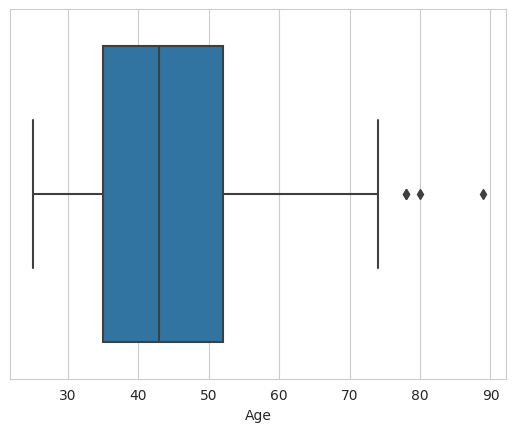

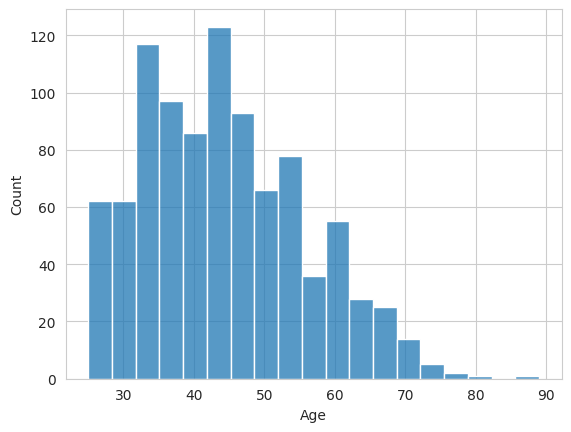

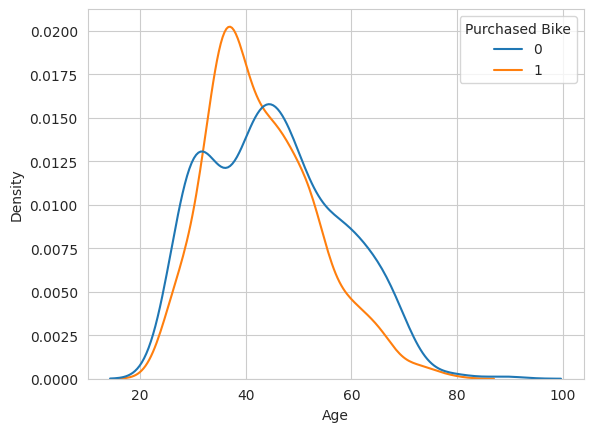

In [17]:
sns.boxplot(data=bikes, x="Age")

plt.show()

sns.histplot(data=bikes, x="Age")

plt.show()

sns.kdeplot(data=bikes, x="Age", hue="Purchased Bike")

plt.show()

**Ages from 30 to 60 are the most common**

**Few outliers do exist, we'll drop them later**

**More people from 30 to 40 did Purchase**

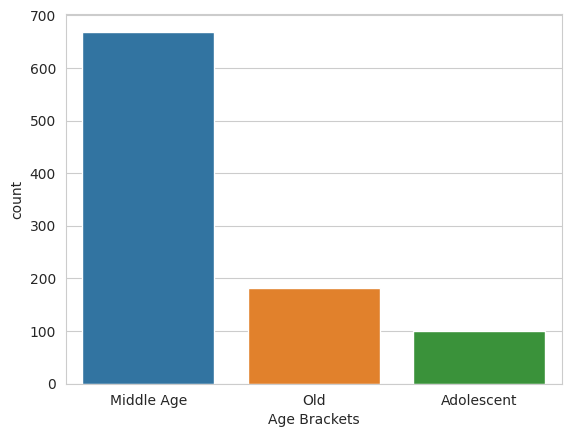

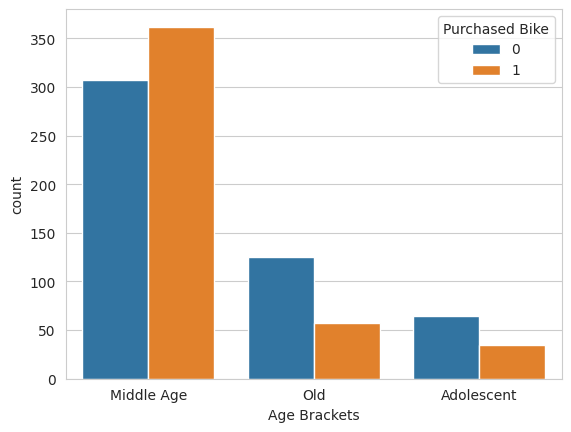

In [18]:
sns.countplot(data=bikes, x="Age Brackets")

plt.show()

sns.countplot(data=bikes, x="Age Brackets", hue="Purchased Bike")

plt.show()

**Middle Age Age Bracket has a higher probability of purchasing, which was already clear from the KDE plot above**

**Since we already have an Age column I may consider dropping this column**

In [19]:
# dropping outliers

from scipy import stats


print(len(bikes))


# Calculate Z-scores for numerical columns

z_scores = np.abs(stats.zscore(bikes.select_dtypes(include=[np.number])))


# Identify outliers (e.g., values with Z-score > 3)

outliers = (z_scores > 3).any(axis=1)

# Filter out outliers from the original dataframe

bikes = bikes[~outliers]


print(len(bikes))

951
943


**Outliers dropped successfully!**

In [20]:
# we handle categorical variables

print(set(bikes["Commute Distance"]))
print(set(bikes["Age Brackets"]))

{'1-2 Miles', '0-1 Miles', '2-5 Miles', '5-10 Miles', 'More than 10 Miles'}
{'Adolescent', 'Old', 'Middle Age'}


In [21]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)



distance_mapping = {'0-1 Miles': 1, '1-2 Miles': 2, '2-5 Miles': 3, '5-10 Miles': 4, 'More than 10 Miles': 5}

bikes['Commute Distance'] = bikes['Commute Distance'].map(distance_mapping)



age_mapping = {'Adolescent': 1, 'Old': 3, 'Middle Age': 2}

bikes["Age Brackets"] = bikes["Age Brackets"].map(age_mapping)



bikes

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,1,0,40000,1,Bachelors,Skilled Manual,1,0,1,Europe,42,2,0
1,1,1,30000,3,Partial College,Clerical,1,1,1,Europe,43,2,0
2,1,1,80000,5,Partial College,Professional,0,2,3,Europe,60,3,0
3,0,1,70000,0,Bachelors,Professional,1,1,4,Pacific,41,2,1
4,0,1,30000,0,Bachelors,Clerical,0,0,1,Europe,36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,60000,2,High School,Professional,1,2,3,North America,54,2,1
996,0,1,70000,4,Graduate Degree,Professional,1,0,3,North America,35,2,1
997,1,1,60000,2,Bachelors,Skilled Manual,1,0,1,North America,38,2,1
998,0,1,100000,3,Bachelors,Management,0,3,2,North America,38,2,0


**I could have easily generated dummy variables but since there is an ordinal nature for these two variables, so I wanted to preserve that**

**So I used mapping instead!**

**The other categorical variables will be replaced with dummy variables**

In [22]:
# we handle the rest of the categorical variables

bikes = pd.get_dummies(bikes)

bikes

,Martial Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Age Brackets,Purchased Bike,...,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Region_Europe,Region_North America,Region_Pacific
0,1,0,40000,1,1,0,1,42,2,0,...,False,False,False,False,False,False,True,True,False,False
1,1,1,30000,3,1,1,1,43,2,0,...,True,False,True,False,False,False,False,True,False,False
2,1,1,80000,5,0,2,3,60,3,0,...,True,False,False,False,False,True,False,True,False,False
3,0,1,70000,0,1,1,4,41,2,1,...,False,False,False,False,False,True,False,False,False,True
4,0,1,30000,0,0,0,1,36,2,1,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,60000,2,1,2,3,54,2,1,...,False,False,False,False,False,True,False,False,True,False
996,0,1,70000,4,1,0,3,35,2,1,...,False,False,False,False,False,True,False,False,True,False
997,1,1,60000,2,1,0,1,38,2,1,...,False,False,False,False,False,False,True,False,True,False
998,0,1,100000,3,0,3,2,38,2,0,...,False,False,False,True,False,False,False,False,True,False


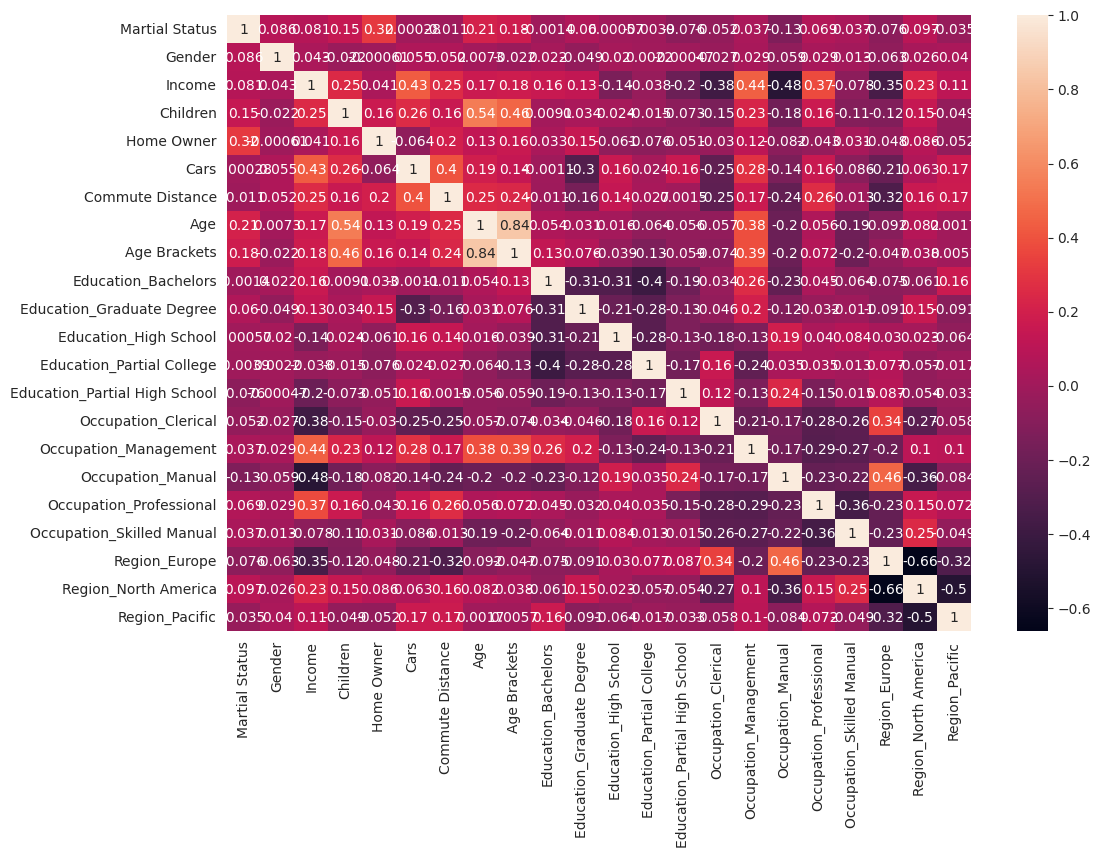

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

fig = sns.heatmap(bikes.drop("Purchased Bike", axis=1).corr(), annot=True)

plt.show()

**As expected, Age is highly correlated with Age Bracket, so we might just drop Age Bracket later in the Machine Learning Phase**

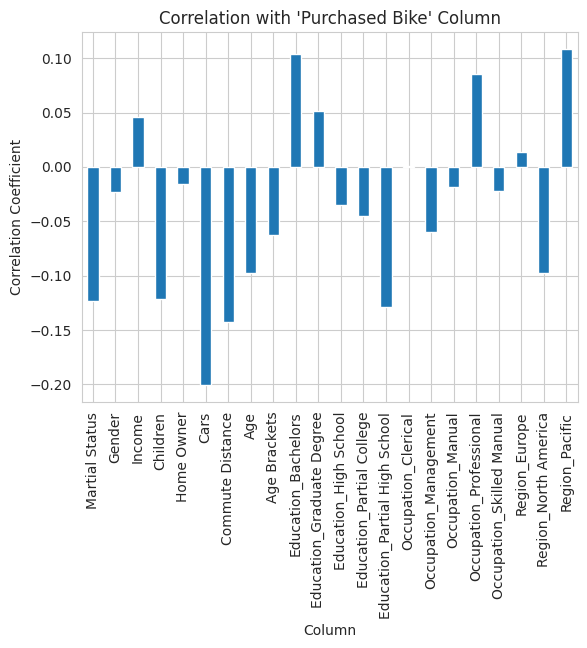

In [24]:
# Calculate correlations

correlations = bikes.corrwith(bikes['Purchased Bike'])


# Drop the correlation with itself

correlations = correlations.drop('Purchased Bike')


# Plot the correlations

correlations.plot(kind='bar')

plt.title("Correlation with 'Purchased Bike' Column")

plt.xlabel("Column")

plt.ylabel("Correlation Coefficient")

plt.show()

**The most correlating features with the target are:**
* Martial Status
* Children
* Cars
* Commute Distance
* Age
* Age Brackets

# **Machine Learning Models**

In [25]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

# **Drop Age Brackets column?**

**I'll compare the performance before and after dropping that column**

In [26]:
# Define the features (X) and target (y)

X = bikes.drop(["Purchased Bike"], axis=1)

y = bikes["Purchased Bike"]


# Create a Decision Tree classifier

clf = DecisionTreeClassifier(random_state=42)


# Define the cross-validation strategy

kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Perform cross-validation

scores = cross_val_score(clf, X, y, cv=kfold, scoring="accuracy")


# Print the cross-validation scores

print("Mean accuracy Before dropping:", scores.mean())





X = bikes.drop(['Purchased Bike', "Age Brackets"], axis=1)

y = bikes["Purchased Bike"]


# Create a Decision Tree classifier

clf = DecisionTreeClassifier(random_state=42)


# Define the cross-validation strategy

kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Perform cross-validation

scores = cross_val_score(clf, X, y, cv=kfold, scoring="accuracy")


# Print the cross-validation scores

print("Mean accuracy After dropping:", scores.mean())

Mean accuracy Before dropping: 0.6373578745919172
Mean accuracy After dropping: 0.6288922661263087


**Dropping it worsens the performance, so we'll keep it**

In [27]:
# create a list of dictionaries to store accuracies to be plotted later

models = []

# **Decision Tree Classifier**

In [28]:
# Define the features (X) and target (y)

X = bikes.drop(["Purchased Bike"], axis=1)

y = bikes["Purchased Bike"]


# Create a Decision Tree classifier

dt = DecisionTreeClassifier(random_state=42)


# Define the cross-validation strategy

kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Perform cross-validation

scores = cross_val_score(dt, X, y, cv=kfold, scoring="accuracy")


# Print the cross-validation scores

print("Mean accuracy Before Optimization:", scores.mean())

models.append({"Model":"Decision Tree", "Optimized":False, "Accuracy":scores.mean()})



# Define the hyperparameter search space

param_grid = {

    'max_depth': [None, 3, 5, 7, 10, 15, 20],

    'min_samples_split': [2, 5, 10, 15, 20],

    'min_samples_leaf': [1, 2, 5, 10, 15],

    'max_features': ['auto', 'sqrt', 'log2', None],

    'random_state': [42]

}


# Perform random search optimization

random_search = RandomizedSearchCV(dt, param_grid, cv=kfold, scoring='accuracy', n_iter=20, random_state=42)

random_search.fit(X, y)


# Print the best hyperparameters and the corresponding score

print("Best hyperparameters:", random_search.best_params_)

print("Best score:", random_search.best_score_)


# Refit the model with the best hyperparameters

dt_optimized = DecisionTreeClassifier(**random_search.best_params_)

dt_optimized.fit(X, y)


# Evaluate the optimized model using cross-validation

scores_optimized = cross_val_score(dt_optimized, X, y, cv=kfold, scoring='accuracy')


print("Mean accuracy After Optimization:", scores_optimized.mean())


models.append({"Model":"Decision Tree", "Optimized":True, "Accuracy":scores_optimized.mean()})

Mean accuracy Before Optimization: 0.6373578745919172
Best hyperparameters: {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}
Best score: 0.6511201170775639
Mean accuracy After Optimization: 0.6511201170775639


# **Random Forest Classifier**

In [29]:
# Create a Random Forest classifier


rf = RandomForestClassifier(random_state=42)



# Perform cross-validation


scores = cross_val_score(rf, X, y, cv=kfold, scoring="accuracy")



# Print the cross-validation scores


print("Mean accuracy Before Optimization:", scores.mean())


models.append({"Model":"Random Forest", "Optimized":False, "Accuracy":scores.mean()})



# Define the hyperparameter search space


param_grid = {


    'n_estimators': [10, 50, 100, 200, 500],


    'max_depth': [None, 3, 5, 7, 10, 15, 20],


    'min_samples_split': [2, 5, 10, 15, 20],


    'min_samples_leaf': [1, 2, 5, 10, 15],


    'max_features': ['auto', 'sqrt', 'log2', None],


    'random_state': [42]


}



# Perform random search optimization


random_search = RandomizedSearchCV(rf, param_grid, cv=kfold, scoring='accuracy', n_iter=20, random_state=42)


random_search.fit(X, y)



# Print the best hyperparameters and the corresponding score


print("Best hyperparameters:", random_search.best_params_)


print("Best score:", random_search.best_score_)



# Refit the model with the best hyperparameters


rf_optimized = RandomForestClassifier(**random_search.best_params_)


rf_optimized.fit(X, y)



# Evaluate the optimized model using cross-validation


scores_optimized = cross_val_score(rf_optimized, X, y, cv=kfold, scoring='accuracy')



print("Mean accuracy After Optimization:", scores_optimized.mean())



models.append({"Model":"Random Forest", "Optimized":True, "Accuracy":scores_optimized.mean()})

Mean accuracy Before Optimization: 0.6882472137791287
Best hyperparameters: {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best score: 0.6892716424631319
Mean accuracy After Optimization: 0.6892716424631319


# **XGBoost Classifier**

In [30]:
# Create an XGBoost classifier


xgb = XGBClassifier(random_state=42, objective='binary:logistic')



# Perform cross-validation


scores = cross_val_score(xgb, X, y, cv=kfold, scoring="accuracy")



# Print the cross-validation scores


print("Mean accuracy Before Optimization:", scores.mean())


models.append({"Model":"XGBoost", "Optimized":False, "Accuracy":scores.mean()})



# Define the hyperparameter search space


param_grid = {


    'max_depth': [3, 5, 7, 10, 15, 20],


    'learning_rate': [0.01, 0.1, 0.5, 1],


    'n_estimators': [10, 50, 100, 200, 500],


    'gamma': [0, 0.1, 0.5, 1],


    'subsample': [0.5, 0.8, 1],


    'colsample_bytree': [0.5, 0.8, 1],


    'reg_alpha': [0, 0.1, 0.5, 1],


    'reg_lambda': [0, 0.1, 0.5, 1],


    'random_state': [42]


}



# Perform random search optimization


random_search = RandomizedSearchCV(xgb, param_grid, cv=kfold, scoring='accuracy', n_iter=20, random_state=42)


random_search.fit(X, y)



# Print the best hyperparameters and the corresponding score


print("Best hyperparameters:", random_search.best_params_)


print("Best score:", random_search.best_score_)



# Refit the model with the best hyperparameters


xgb_optimized = XGBClassifier(**random_search.best_params_)


xgb_optimized.fit(X, y)



# Evaluate the optimized model using cross-validation


scores_optimized = cross_val_score(xgb_optimized, X, y, cv=kfold, scoring='accuracy')



print("Mean accuracy After Optimization:", scores_optimized.mean())



models.append({"Model":"XGBoost", "Optimized":True, "Accuracy":scores_optimized.mean()})

Mean accuracy Before Optimization: 0.6808285489136552
Best hyperparameters: {'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 1, 'random_state': 42, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}
Best score: 0.6956546211865361
Mean accuracy After Optimization: 0.6956546211865361


# **Comparing Model Performances**

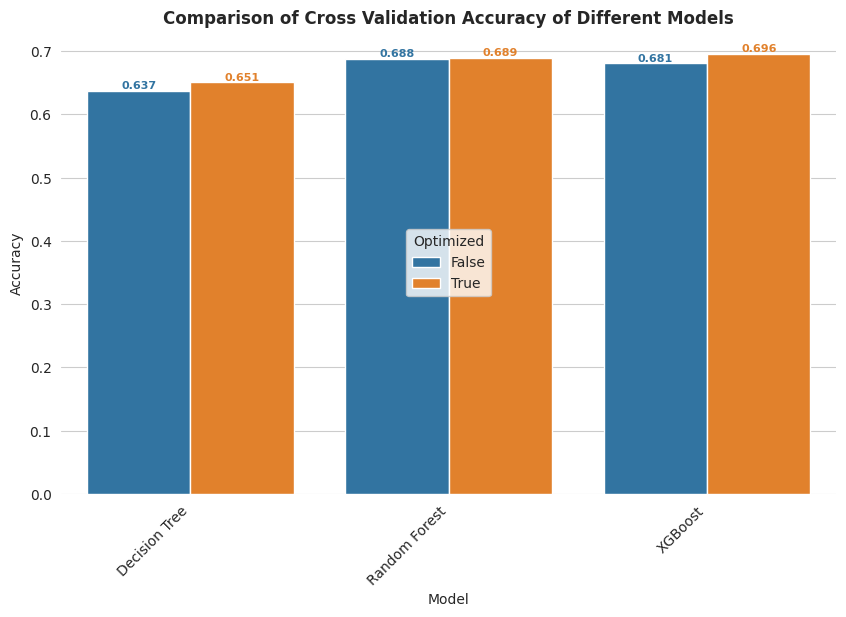

In [31]:
models = pd.DataFrame(models)


# Create the bar plot

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Model", y="Accuracy", data=models, hue="Optimized", ax=ax)


sns.despine(left=True, bottom=True)

ax.set_ylabel("Accuracy")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Add the title in bold font

plt.title("Comparison of Cross Validation Accuracy of Different Models", fontweight='bold')


# Add the scores to each bar with the same color as the bar

for p in ax.patches:

    color = p.get_facecolor()

    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',

                va='bottom', fontsize=8, color=color, fontweight='bold')


# Move the legend to the middle

ax.legend(loc='center', title="Optimized")


plt.show()

# **XGBoost wins with a Cross Validation accuracy of 69.6**